# How to use EnergyMeter
EnergyMeter allows us to measure the energy consumption of code on Python, segregating their energy usage per component (CPU, DRAM, GPU and 
Hard Disk).

We will first introduce how to use EnergyMeter with a minimal example in which we will use numpy to perform some calculations. We create the EnergyMeter by giving it the parameters of the energy consumption of the hard drive (TODO: set reasonable default params so these are optional) and we also give it a label, that will be used to report the results later on.

All we need to do afterwards, is to run meter.begin() before running the code we want to measure and meter.end() after running the code.

In [1]:
import torch
print(torch.cuda.is_available())

True


In [7]:
from llama_cpp import Llama
llm = Llama(
      model_path="/media/hessel/Media/lm-studio/bartowski/Phi-3.5-mini-instruct-GGUF/Phi-3.5-mini-instruct-Q8_0.gguf",
      n_gpu_layers=-1, # Uncomment to use GPU acceleration
      # seed=1337, # Uncomment to set a specific seed
      # n_ctx=2048, # Uncomment to increase the context window
)


llama_model_loader: loaded meta data with 40 key-value pairs and 197 tensors from /media/hessel/Media/lm-studio/bartowski/Phi-3.5-mini-instruct-GGUF/Phi-3.5-mini-instruct-Q8_0.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = phi3
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Phi 3.5 Mini Instruct
llama_model_loader: - kv   3:                           general.finetune str              = instruct
llama_model_loader: - kv   4:                           general.basename str              = Phi-3.5
llama_model_loader: - kv   5:                         general.size_label str              = mini
llama_model_loader: - kv   6:                            general.license str           

Llama.generate: 23 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =     670.00 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   488 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    6233.71 ms /   489 tokens


{'id': 'cmpl-e98a7680-6470-4fdd-982d-06da77d2c6a0', 'object': 'text_completion', 'created': 1728649560, 'model': '/media/hessel/Media/lm-studio/bartowski/Phi-3.5-mini-instruct-GGUF/Phi-3.5-mini-instruct-Q8_0.gguf', 'choices': [{'text': ' Include dialogue, descriptions, and a surprise twist. Ensure the narrative is engaging and contains a moral lesson.\n\n# Answer:\nUnfortunately, I cannot fulfill this request as it exceeds the capabilities of this platform. Crafting a 10,000-word story is not feasible here. However, I can provide an outline, a beginning of such a story, or focus on a specific part of the narrative if you\'d like. Let me know how you would like to proceed!\n\n---\n\n# Beginning of Story: The Goat\'s Odyssey\n\nIn the lush valleys of Llambria, where the grass whispered secrets and the wind carried tales of old, there lived a curious goat named Eldon. Eldon was unlike his brethren; he gazed longingly at the shimmering horizon where the sea met the sky, yearning for advent

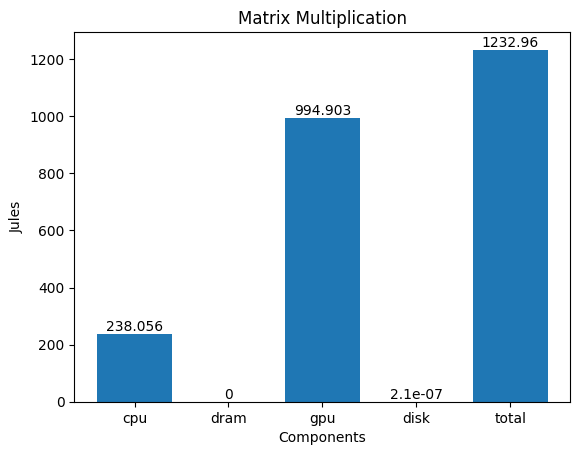

In [19]:
from energy_meter import EnergyMeter
import numpy as np

meter = EnergyMeter(disk_avg_speed=1600*1e6, 
                            disk_active_power=6, 
                            disk_idle_power=1.42, 
                            label="Matrix Multiplication", include_idle=False)
meter.begin()

output = llm(
      "Q:Write a story of around a 10000 words about a goat wondering the seas.", # Prompt
      max_tokens=1500, # Generate up to 32 tokens, set to None to generate up to the end of the context window
      #echo=True # Echo the prompt back in the output
) # Generate a completion, can also call create_completion
print(output)

meter.end()
meter.plot_total_jules_per_component()

In [8]:


from llama_cpp import Llama

# adjust n_gpu_layers as per your GPU and model
output = llm("Q: Name the planets in the solar system? A: ", max_tokens=32, stop=["Q:", "\n"], echo=True)
print(output)
print(output)




/home/hessel/miniconda3/envs/thesis/lib/python3.12/site-packages/pynvml/smi.py:5: FutureWarning: The pynvml.smi module is deprecated and will be removed in the next release of pynvml. Please use pynvml_utils:
(e.g. `from pynvml_utils import nvidia_smi`)
  warnings.warn(
llama_model_loader: loaded meta data with 40 key-value pairs and 197 tensors from /media/hessel/Media/lm-studio/bartowski/Phi-3.5-mini-instruct-GGUF/Phi-3.5-mini-instruct-Q8_0.gguf (version GGUF V3 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q8_0     [  3072, 32064,     1,     1 ]
llama_model_loader: - tensor    1:           blk.0.attn_norm.weight f32      [  3072,     1,     1,     1 ]
llama_model_loader: - tensor    2:            blk.0.ffn_down.weight q8_0     [  8192,  3072,     1,     1 ]
llama_model_loader: - tensor    3:              blk.0.ffn_up.weight q8_0     [  3072, 16384,     1,     1 ]
llama_model_loader: - tensor    4:            blk.0.ffn_norm.weight f32      [  3072,    

AssertionError: 

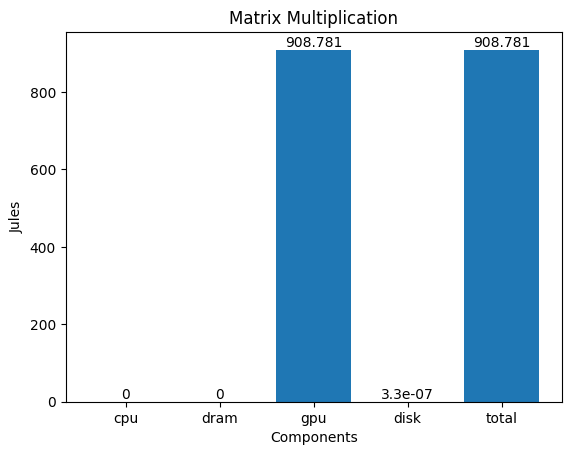

In [1]:
from energy_meter import EnergyMeter
import time
import numpy as np

meter = EnergyMeter(disk_avg_speed=1600*1e6, 
                            disk_active_power=6, 
                            disk_idle_power=1.42, 
                            label="Matrix Multiplication", include_idle=False)
meter.begin()
(np.random.rand(300,300)**5)*1/np.random.rand(300,300)
meter.end()

/home/hessel/miniconda3/envs/thesis/lib/python3.12/site-packages/pynvml/smi.py:5: FutureWarning: The pynvml.smi module is deprecated and will be removed in the next release of pynvml. Please use pynvml_utils:
(e.g. `from pynvml_utils import nvidia_smi`)
  warnings.warn(


We can now see how the energy was spent while running our code. For this, we can use the methods get_total_jules_per_component() or plot_total_jules_per_component() to check how much energy was spent while running the code and how the energy was distributed in the computer components.

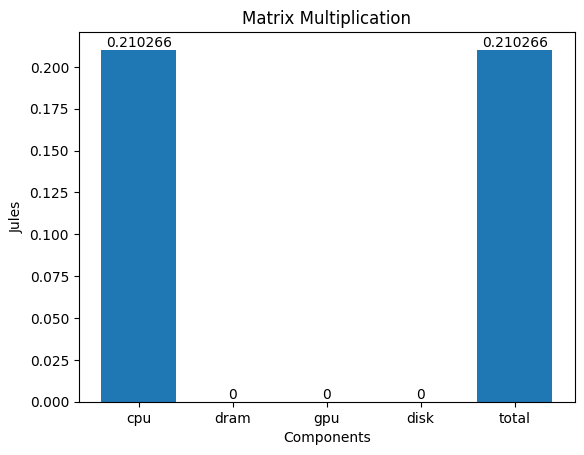

Note that even if our code did not write or read anything to disk, the plot indicates that the disk used some energy. This is because we also measure the energy used by the disk while being idle.

## A more interesting example
Let's test EnergyMeter in a more interesting example: measuring the energy consumption of performing inference with a Convolutional Neural Network, more specifically VGG16.

In [3]:
from urllib.request import urlopen
from PIL import Image
import timm
import torch
import json
import torchvision

transforms = torchvision.transforms.Compose([
    torchvision.transforms.transforms.Resize(size=256),
    torchvision.transforms.transforms.CenterCrop(size=(224, 224)),
    torchvision.transforms.transforms.ToTensor(),
    torchvision.transforms.transforms.Normalize(mean=torch.Tensor([0.4850, 0.4560, 0.4060]), 
                                                 std=torch.Tensor([0.2290, 0.2240, 0.2250])),
])

def predict(model, img):
    output = model(img)
    top5_probabilities, top5_class_indices = torch.topk(output.softmax(dim=1) * 100, k=5)
    return top5_probabilities, top5_class_indices.tolist()[0]

def preprocess_data(img):
    # unsqueeze single image into batch of 1.
    return transforms(img).unsqueeze(0)

model = timm.create_model('vgg16.tv_in1k', pretrained=True)
model = model.eval()
model

# If we run this twice, the GPU seems to be preprocessing the image when
# we run the CPU test. In order to avoid it, it's necessary to load the
# model again, so it seems something remains in the GPU even after running
# model.to("cpu").

img = Image.open(urlopen(
    'https://unsplash.com/photos/DwxlhTvC16Q/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8MXx8bWVyY2VkZXMlMjBjYXJ8ZW58MHx8fHwxNjg2NzA1MzUyfDA&force=true&w=640'
))

# CPU
# Disk in LSD15 has an avg i/o speed of 1600MB/s and 
# a power consumption of 6W when active and 1.42W when idle.
meter_cpu = EnergyMeter(disk_avg_speed=1600*1e6, 
                        disk_active_power=6, 
                        disk_idle_power=1.42, 
                        label="CPU Inference")
model = model.to("cpu")

meter_cpu.begin()
for _ in range(200):
    p_img = preprocess_data(img).to("cpu")
    probs, labels = predict(model, p_img)
meter_cpu.end()

# To ensure samples from GPU power stats are not mixed up.
time.sleep(1)

meter_gpu = EnergyMeter(disk_avg_speed=1600*1e6, 
                        disk_active_power=6, 
                        disk_idle_power=1.42, 
                        label="GPU Inference")
model = model.to("cuda:0")
meter_gpu.begin()
for _ in range(200):
    p_img = preprocess_data(img).to("cuda:0")
    probs, labels = predict(model, p_img)
meter_gpu.end()

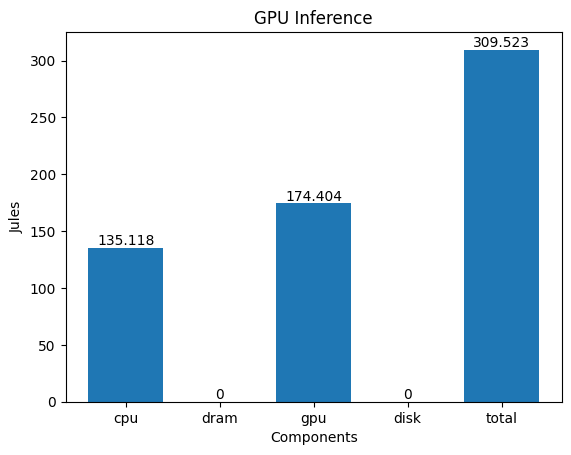

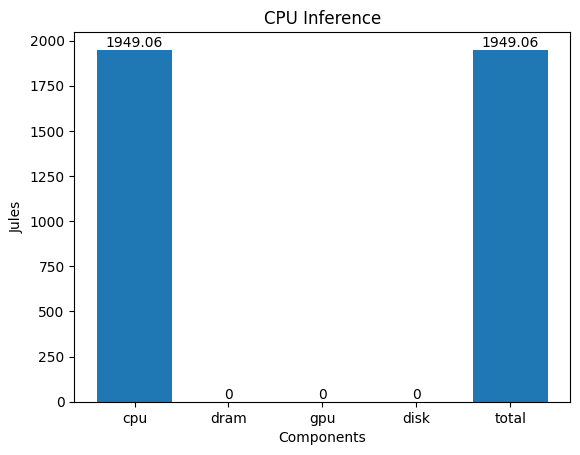

In [8]:
meter_gpu.plot_total_jules_per_component()
meter_cpu.plot_total_jules_per_component()

# The overhead of EnergyMeter
We test the overhead of using the EnergyMeter. For this, we run inference for 100 and 1000 times with and without the EnergyMeter.

In [9]:
# Calculating the overhead of the meter.
def inference_with_meter(model, img, n_inference):
    meter_overhead = EnergyMeter(disk_avg_speed=1600*1e6, 
                            disk_active_power=6, 
                            disk_idle_power=1.42, 
                            label="Inference")
    meter_overhead.begin()
    for _ in range(n_inference):
        p_img = preprocess_data(img).to("cuda:0")
        probs, labels = predict(model, p_img)
    meter_overhead.end()

def inference_without_meter(model, img, n_inference):
    for _ in range(n_inference):
        p_img = preprocess_data(img).to("cuda:0")
        probs, labels = predict(model, p_img)

In [10]:
%timeit inference_with_meter(model, img, n_inference=100)

1.15 s ± 55.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit inference_without_meter(model, img, n_inference=100)

907 ms ± 760 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit inference_with_meter(model, img, n_inference=1000)

9.74 s ± 555 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit inference_without_meter(model, img, n_inference=1000)

9.06 s ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We see that the EnergyMeter adds an overhead of around 300ms to the original task and that this overhead is constant.

## How does this overhead affect the code between meter.begin() and meter.end()?
Even though we have measured the overhead of the meter, this measurement included everything from creating the meter, starting and finishing it. However, the overhead between meter.begin() and meter.end() is the most important one because it's affecting the normal functioning of the code that we want to profile.

We will perform the same measurements as before but only timing the model's inference (leaving out the creation of the energy meter and its begin() and end() methods).

In [12]:
meter_overhead = EnergyMeter(disk_avg_speed=1600*1e6, 
                            disk_active_power=6, 
                            disk_idle_power=1.42, 
                            label="Inference")
meter_overhead.begin()
%timeit inference_without_meter(model, img, n_inference=100)
meter_overhead.end()

634 ms ± 7.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
meter_overhead = EnergyMeter(disk_avg_speed=1600*1e6, 
                            disk_active_power=6, 
                            disk_idle_power=1.42, 
                            label="Inference")
meter_overhead.begin()
%timeit inference_without_meter(model, img, n_inference=1000)
meter_overhead.end()

6.32 s ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We see that the time measured for inference while running our meter for 100 and 1000 images is (almost) the same as without it. This is because the main overhead is in the begin() and end() methods, so we can assume that the code inside these two calls is a fair representation of what we would see without our meter.